In [86]:
# RUN THIS CELL
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_csv("C:/Users/thaku/Downloads/m23/time_series/Data/EnergyProduction.csv",index_col=0,parse_dates=True)
df.head()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


### 1. Assign a frequency of 'MS' to the DatetimeIndex.

In [87]:
# CODE HERE
df.index.freq= 'MS'


In [88]:
df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')

In [89]:
# DON'T WRITE HERE

### 2. Plot the dataset.

<Axes: xlabel='DATE'>

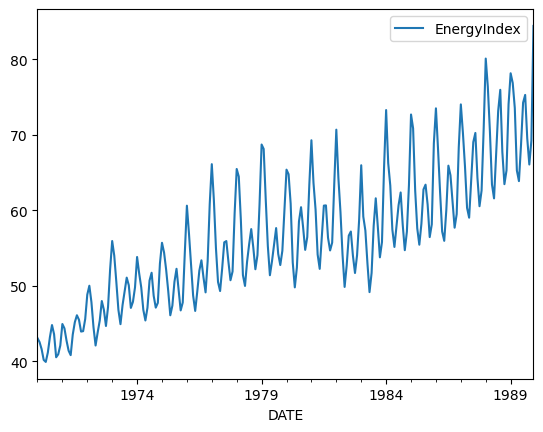

In [90]:
# CODE HERE
df.plot()

In [91]:
# DON'T WRITE HERE

### 3. Add a column that shows a 12-month Simple Moving Average (SMA).<br>&nbsp;&nbsp;&nbsp;&nbsp;Plot the result.

In [92]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [93]:
span = 12
alpha = 2/(span+1)

In [94]:
model = SimpleExpSmoothing(df['EnergyIndex'])

In [95]:
fitted_model = model.fit(smoothing_level = alpha, optimized = False)

In [96]:
df['12 sme'] = fitted_model.fittedvalues.shift(-1)

In [97]:
df.head()

,EnergyIndex,12 sme
DATE,,
1970-01-01,43.0869,43.086900
1970-02-01,42.5577,43.005485
1970-03-01,41.6215,42.792564
1970-04-01,40.1982,42.393431
1970-05-01,39.9321,42.014765


<Axes: xlabel='DATE'>

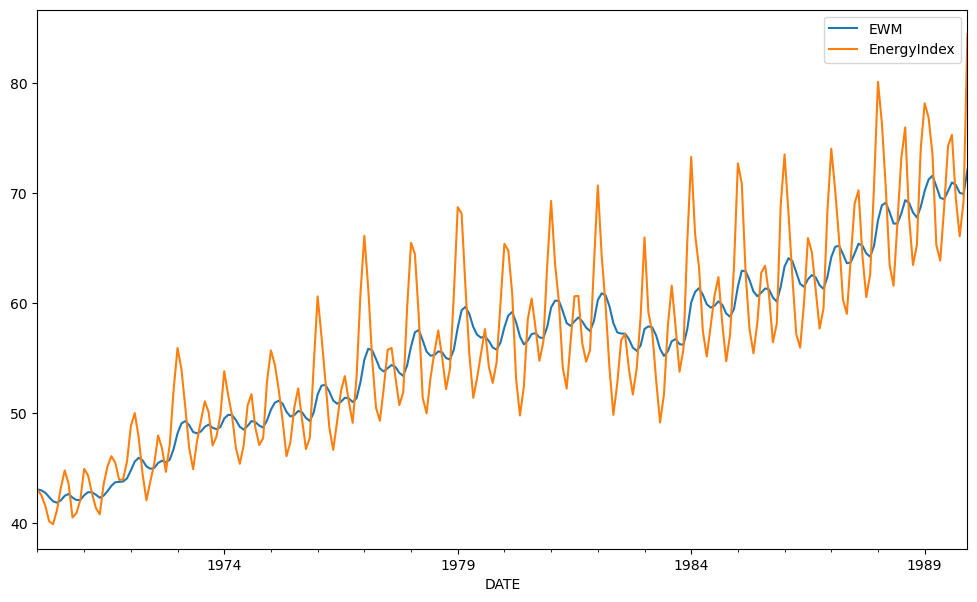

In [98]:
#ewm method =
df['EWM'] = df['EnergyIndex'].ewm(span = 12,adjust = False).mean()
df.head()
df[['EWM','EnergyIndex']].plot(figsize = (12,7))

<Axes: xlabel='DATE'>

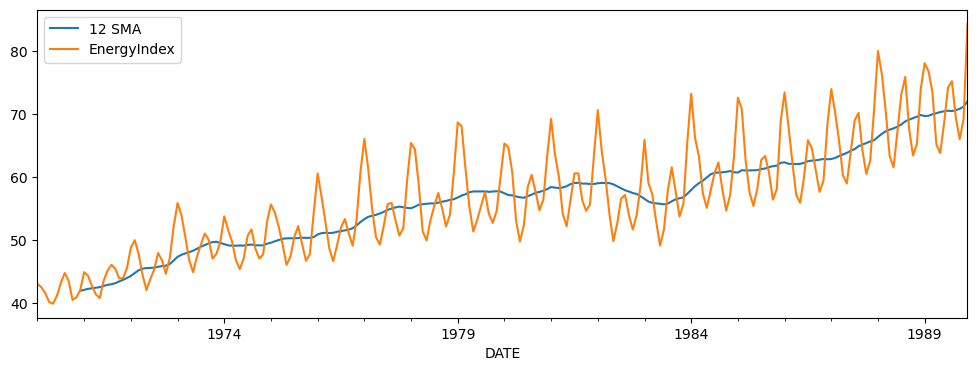

In [99]:
### simple ma
df['12 SMA'] = df['EnergyIndex'].rolling(window = 12).mean()
df[['12 SMA', 'EnergyIndex']].plot(figsize = (12,4))

In [100]:
# DON'T WRITE HERE

### 4. Add a column that shows an Exponentially Weighted Moving Average (EWMA) with a span of 12 using the statsmodels <tt>SimpleExpSmoothing</tt> function. Plot the result.

<Axes: xlabel='DATE'>

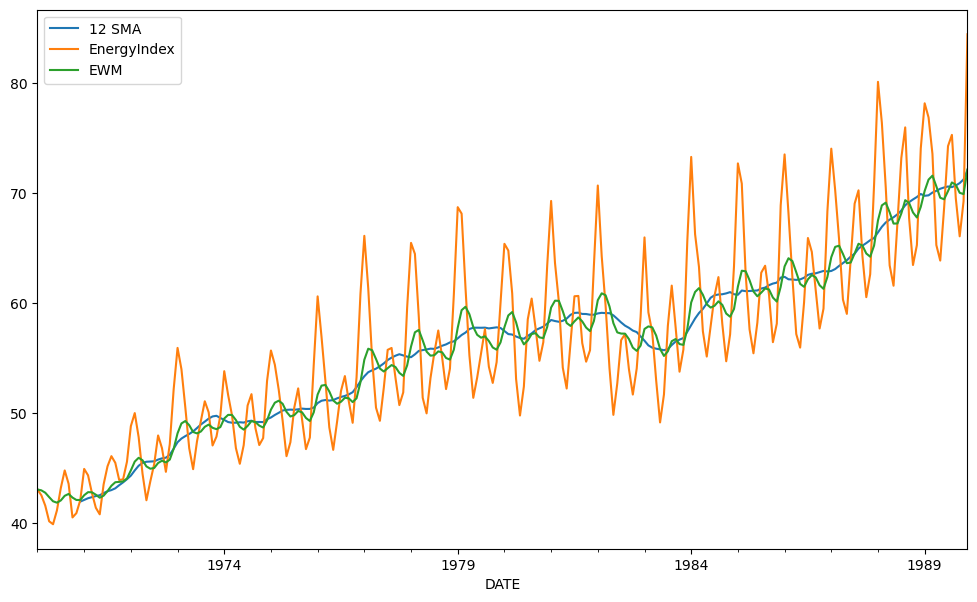

In [101]:
# DON'T FORGET TO PERFORM THE IMPORT!
df[['12 SMA','EnergyIndex','EWM']].plot(figsize = (12,7))

In [102]:
df.head()

,EnergyIndex,12 sme,EWM,12 SMA
DATE,,,,
1970-01-01,43.0869,43.086900,43.086900,NaN
1970-02-01,42.5577,43.005485,43.005485,NaN
1970-03-01,41.6215,42.792564,42.792564,NaN
1970-04-01,40.1982,42.393431,42.393431,NaN
1970-05-01,39.9321,42.014765,42.014765,NaN


In [103]:
# DON'T WRITE HERE

### 5. Add a column to the DataFrame that shows a Holt-Winters fitted model using Triple Exponential Smoothing with multiplicative models. Plot the result.

In [104]:
# DON'T FORGET TO PERFORM THE IMPORT!


In [105]:
# DON'T WRITE HERE

### OPTIONAL: Plot the same  as above, but for only the first two years.

In [106]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['TESmul12'] = ExponentialSmoothing(df['EnergyIndex'], trend ='mul',seasonal = 'mul').fit().fittedvalues.shift(-1)

In [115]:
from matplotlib import dates

In [108]:
df.head()

,EnergyIndex,12 sme,EWM,12 SMA,TESmul12
DATE,,,,,
1970-01-01,43.0869,43.086900,43.086900,NaN,41.068159
1970-02-01,42.5577,43.005485,43.005485,NaN,39.724743
1970-03-01,41.6215,42.792564,42.792564,NaN,37.961982
1970-04-01,40.1982,42.393431,42.393431,NaN,38.600731
1970-05-01,39.9321,42.014765,42.014765,NaN,42.335711


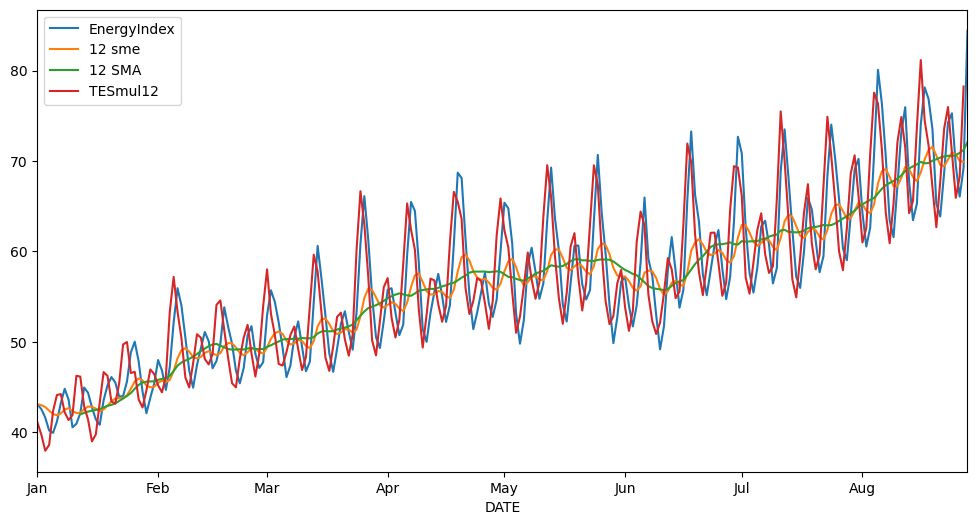

In [116]:

ax = df[['EnergyIndex','12 sme','12 SMA','TESmul12']].plot(figsize = (12,6))

ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter("%b"))


ax.xaxis.set_minor_locator(dates.YearLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter("%Y"))


In [110]:
# DON'T WRITE HERE

### BONUS QUESTION: There is a visible decline in the Industrial Production Index around 1982-1983.<br>Why do you think this might be?

<Axes: xlabel='DATE'>

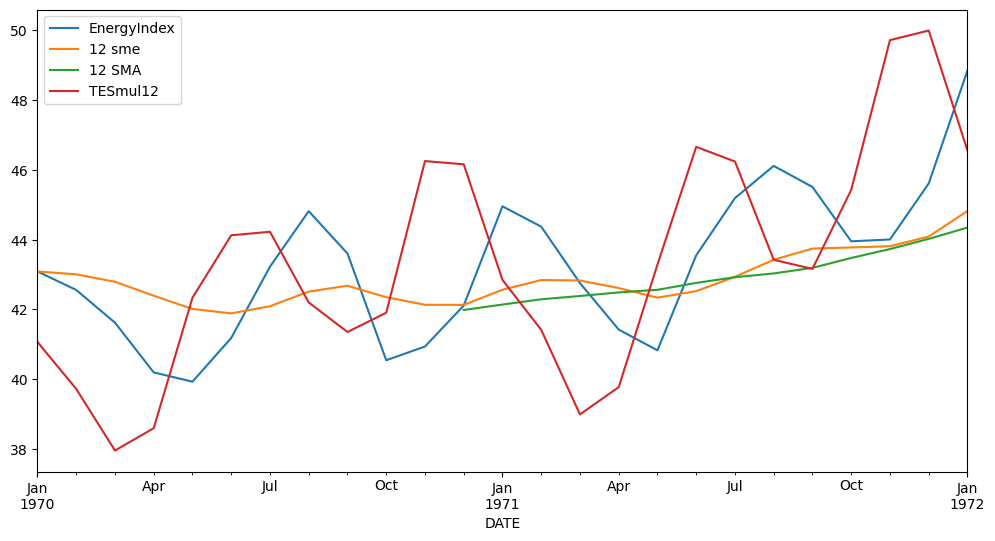

In [118]:
df[['EnergyIndex','12 sme','12 SMA','TESmul12']].loc[:'1972-01-01'].plot(figsize = (12,6))

## Great job!

In [119]:
# recession in us
